# Getting Started <a id="1.1"></a>
Here we use Linear Regression to build a model which predict the sales of a product depending on its advertisement in
different medium (example: TV, radio, newspaper)

# Import Libraries <a id="1.1"></a>

In [1]:
# lmport Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Importing and Inspecting the Data <a id="1.2"></a>

In [2]:
dataset = pd.read_csv("Advertising.csv")
print(dataset.shape)
print(dataset.head(5))

(200, 5)
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
dataset.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Scatter Plot

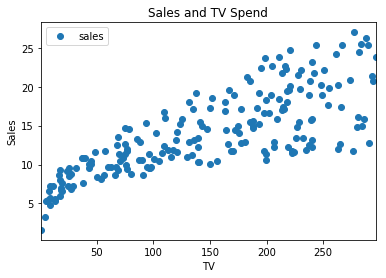

In [4]:
dataset.plot(x='TV', y='sales', style='o')  
plt.title('Sales and TV Spend')  
plt.xlabel('TV')  
plt.ylabel('Sales')  
plt.show()

# Fitting the Model <a id="2"></a>

In this section the input and output is setup, the train test split is done**

# Setting up the input and the output variable <a id="2.1"></a>

In [5]:
# Selecting the Second, Third and Fouth Column
X= dataset.iloc[:,1:4]
# Selecting Fouth Columnn
y=dataset.iloc[:,4]

# Fitting The linear Regression Model <a id="2.2"></a>

In [6]:
# Splitting the Data and output in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Inspecting the Model <a id="2.3"></a>

In [7]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

2.99489303049533
[ 0.04458402  0.19649703 -0.00278146]


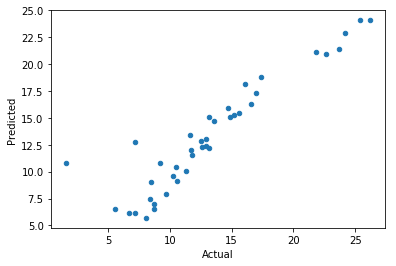

In [8]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({ 'Actual':y_test.values,'Predicted': y_pred})
ax1 = df.plot.scatter(x='Actual',
                      y='Predicted')

# Checking out the validity of the model <a id="2.4"></a>

In [9]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

C:\Users\Debjit Ghosh\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     505.4
Date:                Fri, 03 Apr 2020   Prob (F-statistic):           4.23e-80
Time:                        13:55:39   Log-Likelihood:                -297.29
No. Observations:                 160   AIC:                             602.6
Df Residuals:                     156   BIC:                             614.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9949      0.330      9.076      0.0